In [2]:
!pip install seaborn

In [3]:
!pip install pandas_datareader

In [4]:
!pip install yfinance

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
yf.pdr_override()

from datetime import datetime



yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [9]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500,AMAZON
2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200,AMAZON
2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000,AMAZON
2024-07-02,197.279999,200.429993,195.929993,200.000000,200.000000,45600000,AMAZON
2024-07-03,199.940002,200.029999,196.759995,197.589996,197.589996,31597900,AMAZON
2024-07-05,198.649994,200.550003,198.169998,200.000000,200.000000,39858900,AMAZON
2024-07-08,200.039993,201.199997,197.960007,199.289993,199.289993,34767300,AMAZON
2024-07-09,199.399994,200.570007,199.050003,199.339996,199.339996,32700100,AMAZON
2024-07-10,200.000000,200.110001,197.690002,199.789993,199.789993,32829900,AMAZON


In [12]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,185.155620,186.779012,183.674941,185.264546,184.817498,6.038216e+07
std,12.803750,13.015109,12.644671,12.916745,12.996783,2.468485e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.696490e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.376350e+07
75%,191.899994,193.000000,190.830002,192.250000,191.562653,6.613340e+07
max,231.311996,233.080002,229.250000,232.979996,232.979996,2.464214e+08


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-07-11 to 2024-07-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


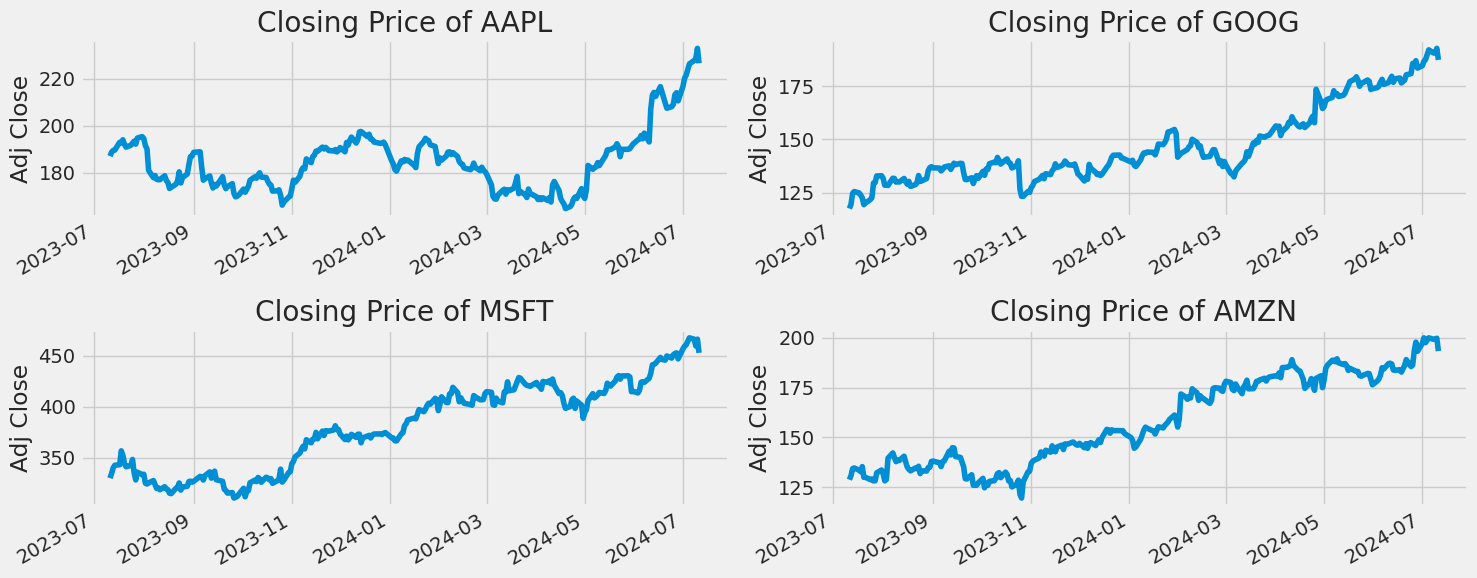

In [14]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

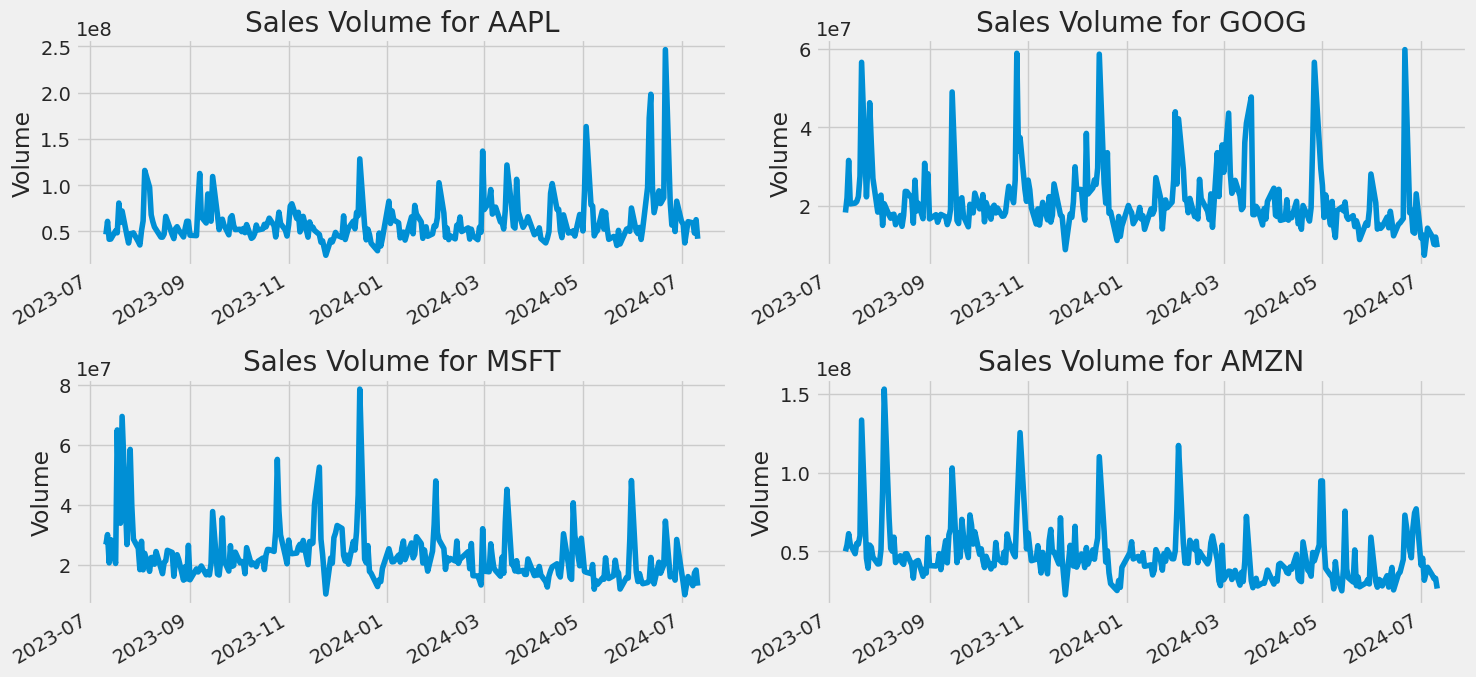

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [16]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

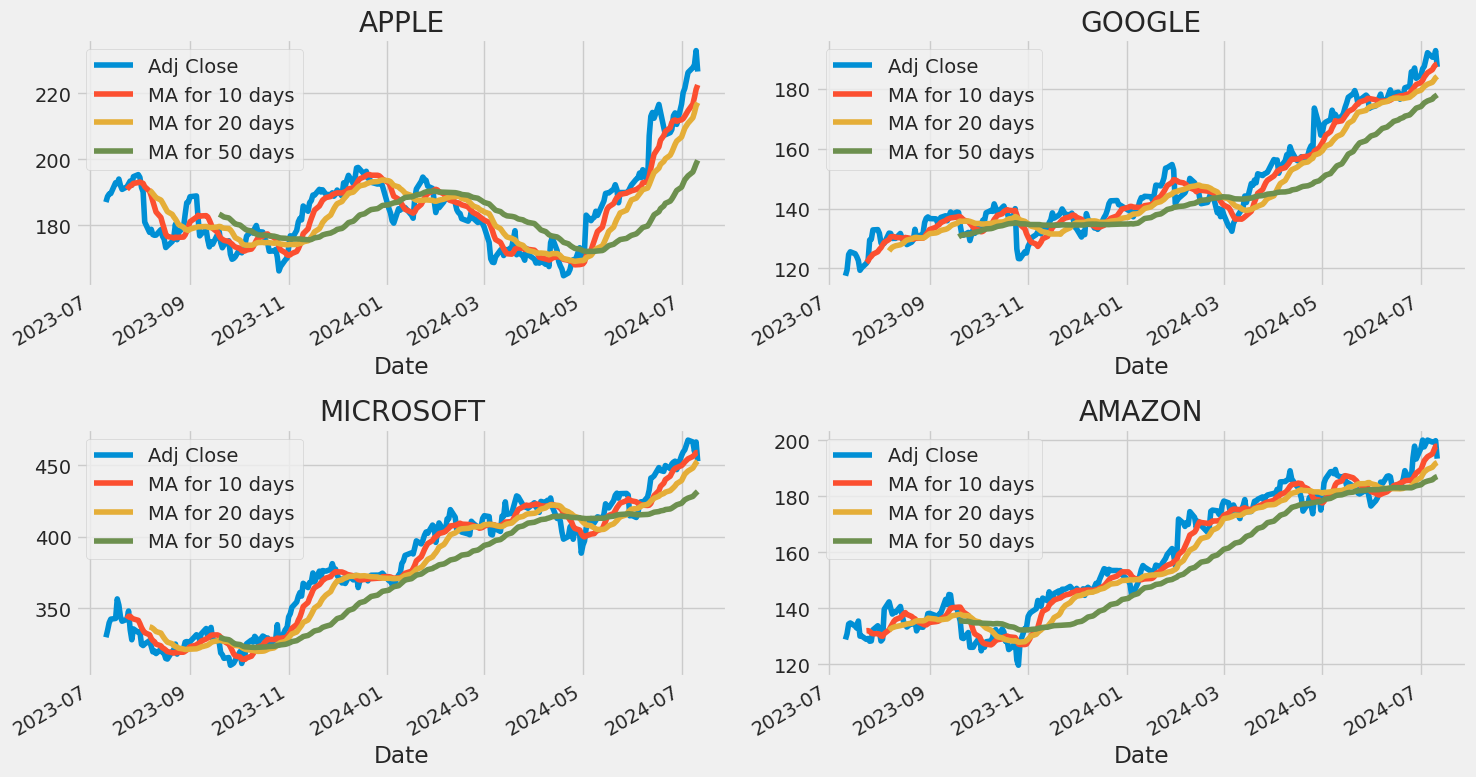

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

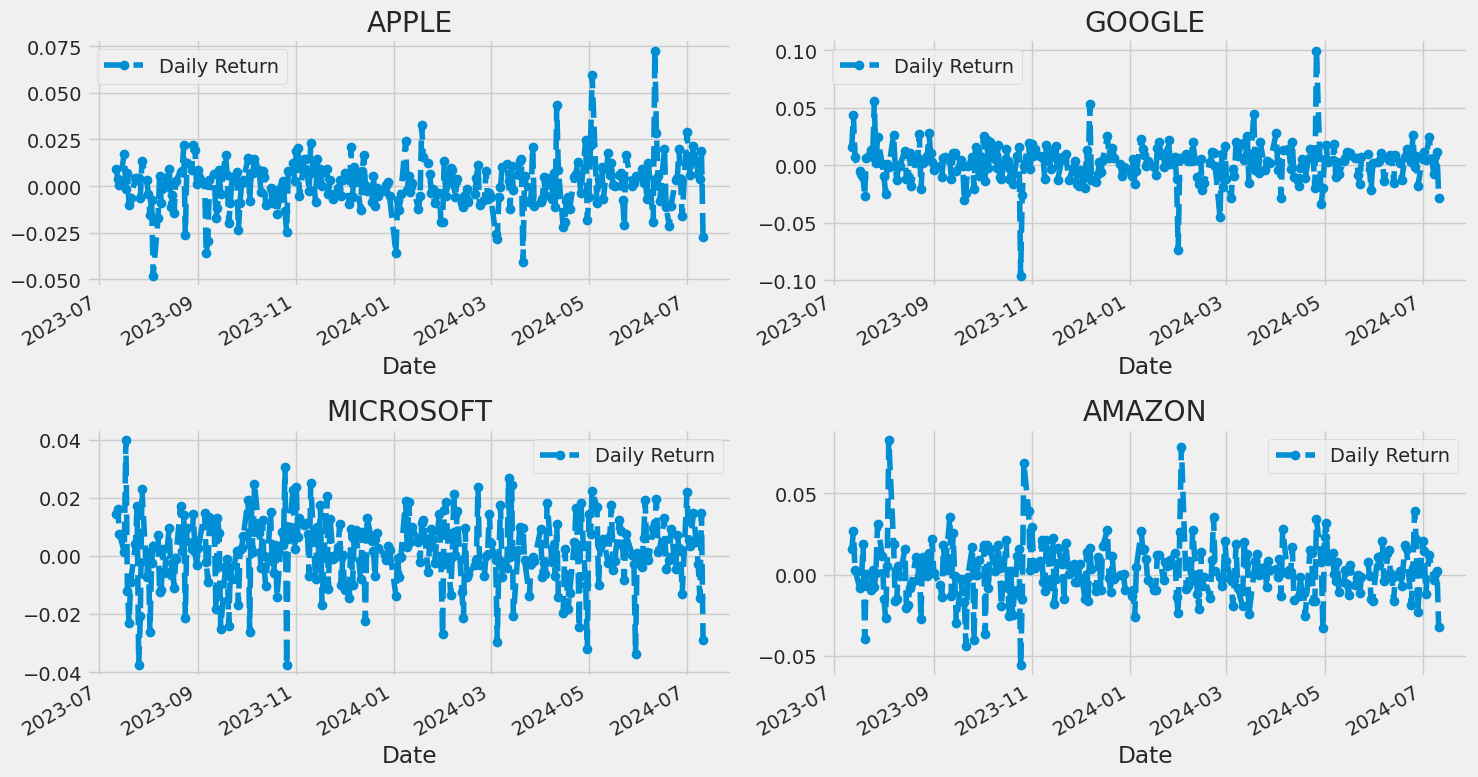

In [18]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

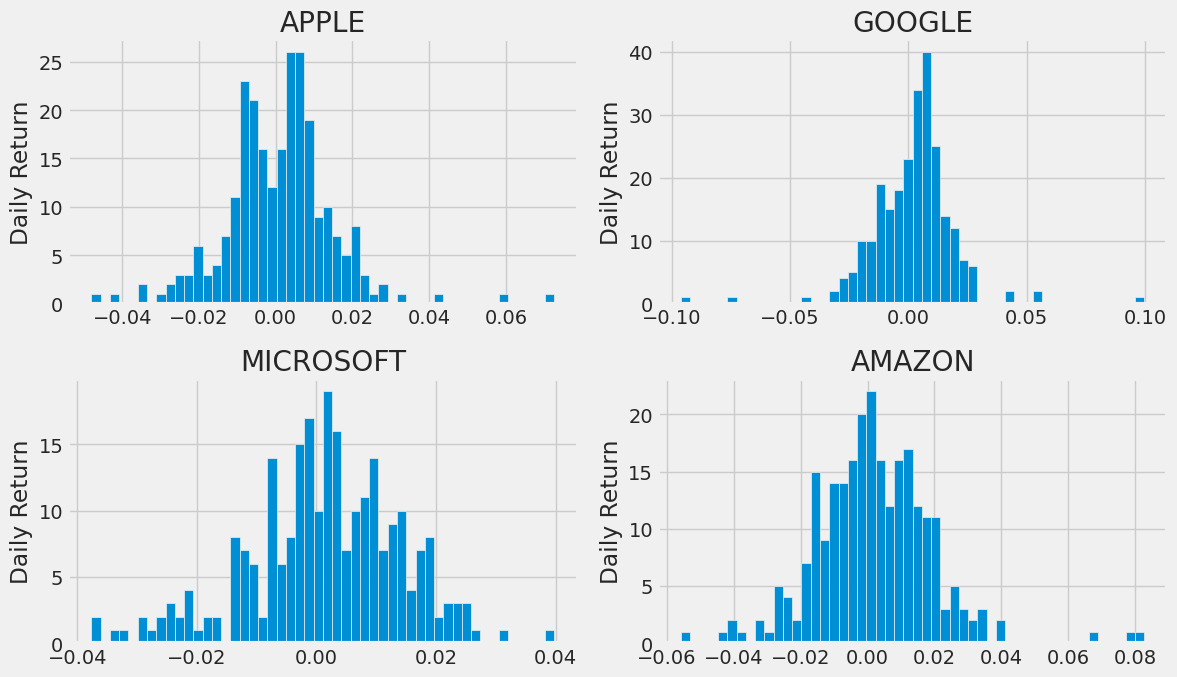

In [19]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame
# Fetch historical data using yfinance
data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Create DataFrame
closing_df = pd.DataFrame(data)

# Let's take a quick look
closing_df.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-11,187.086441,128.779999,117.576202,329.889404
2023-07-12,188.767502,130.800003,119.484032,334.582703
2023-07-13,189.533432,134.300003,124.688110,340.000336
2023-07-14,189.682648,134.679993,125.557121,342.560242
2023-07-17,192.965210,133.559998,124.917847,343.046478


In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-11,NaN,NaN,NaN,NaN
2023-07-12,0.008985,0.015686,0.016226,0.014227
2023-07-13,0.004058,0.026758,0.043555,0.016192
2023-07-14,0.000787,0.002829,0.006969,0.007529
2023-07-17,0.017306,-0.008316,-0.005092,0.001419


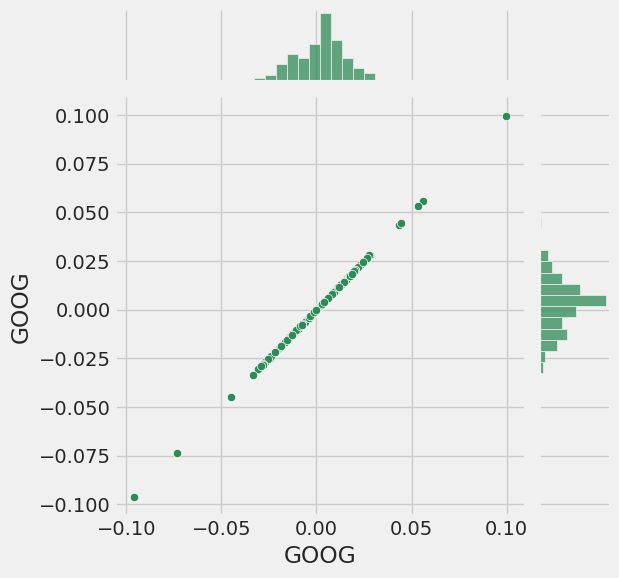

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

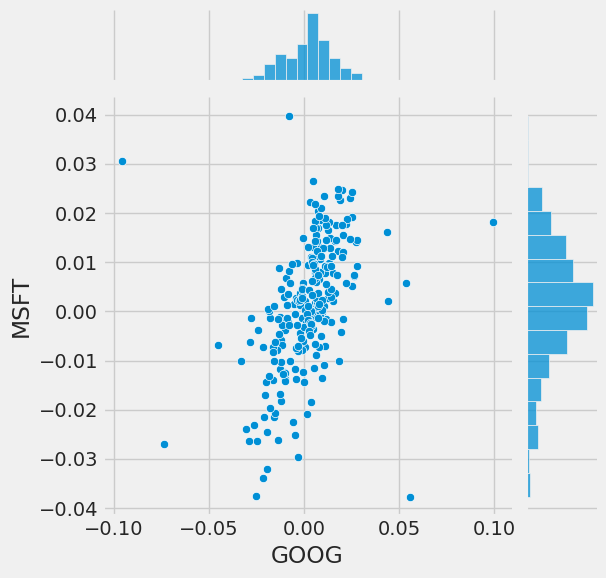

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

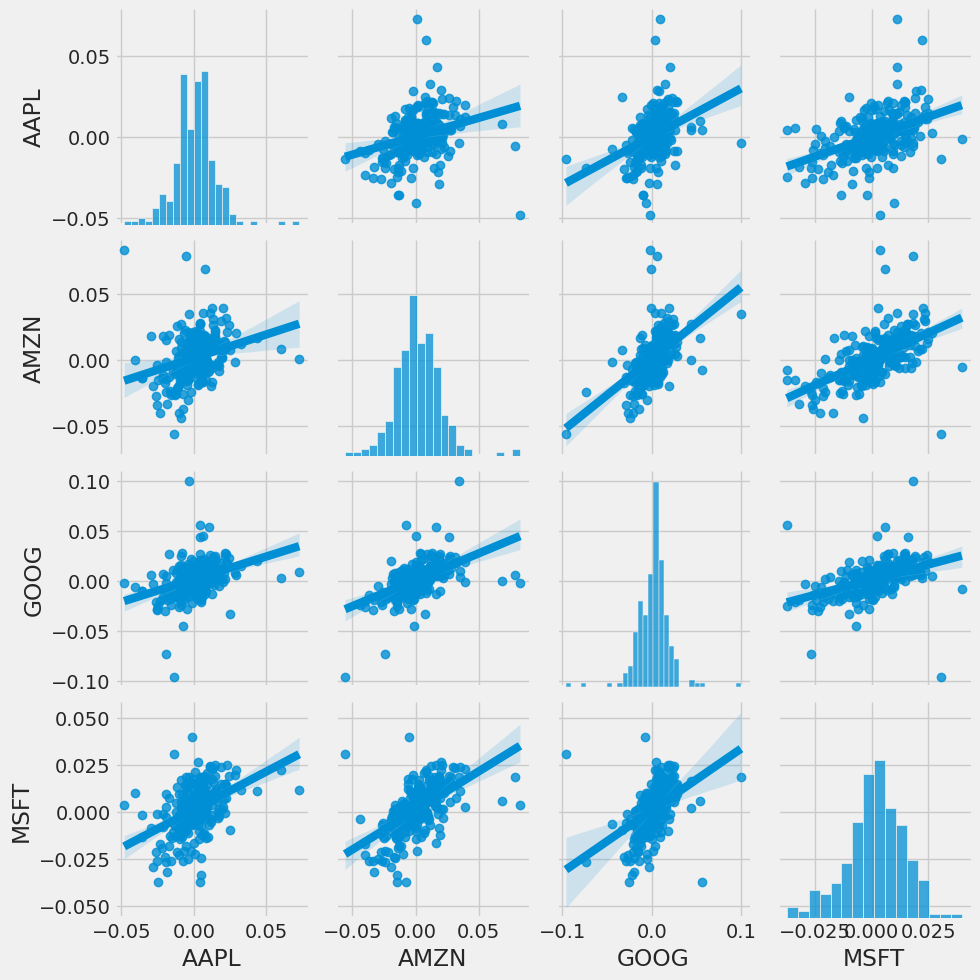

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

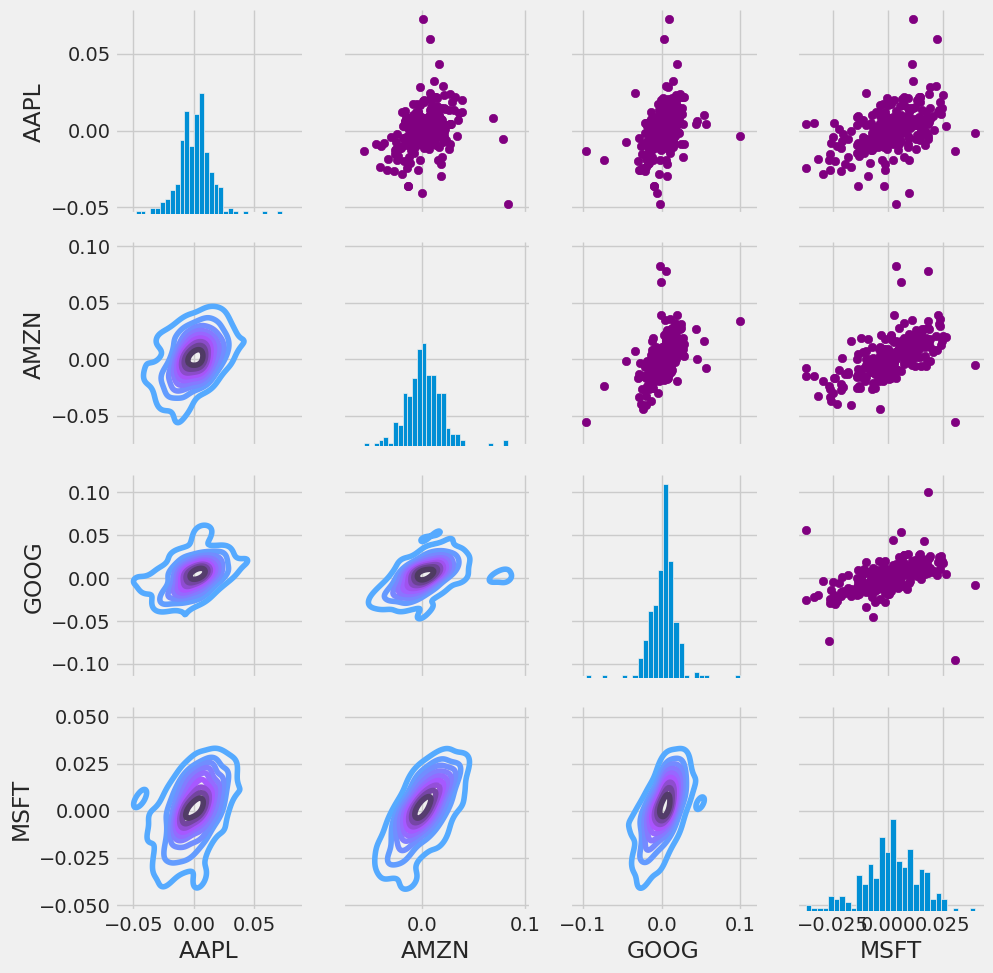

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

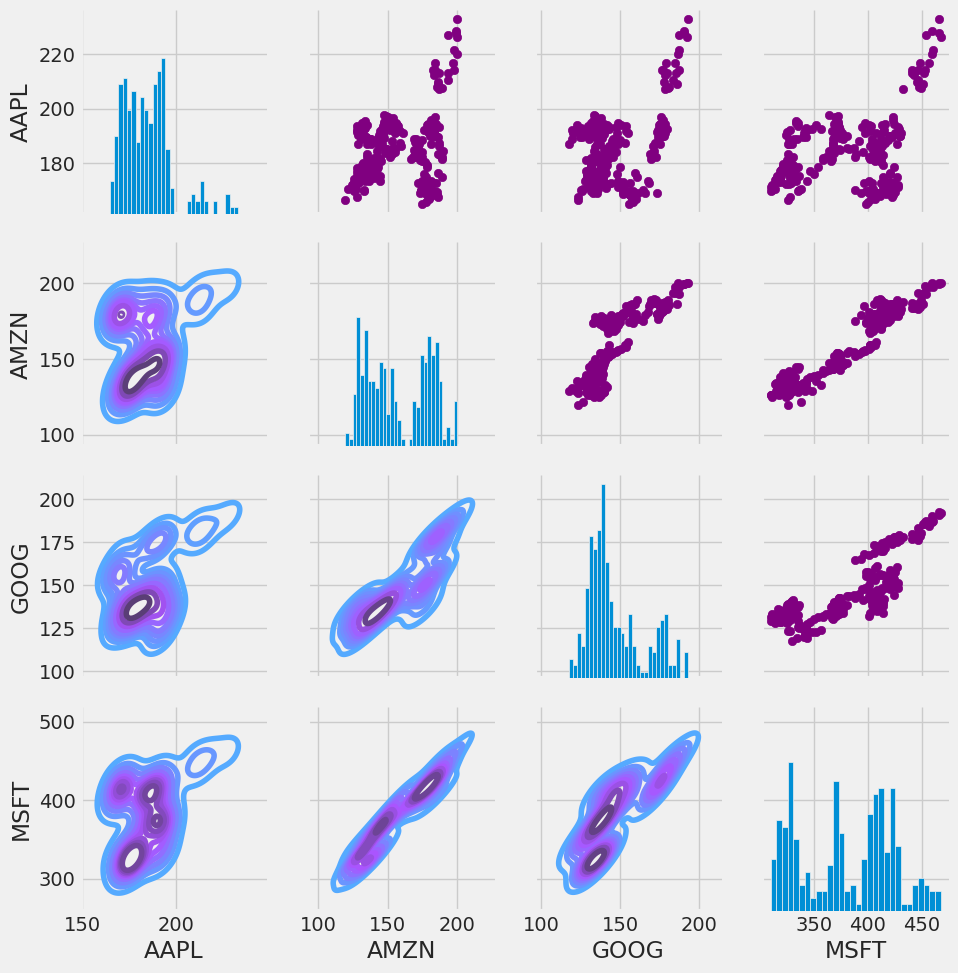

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

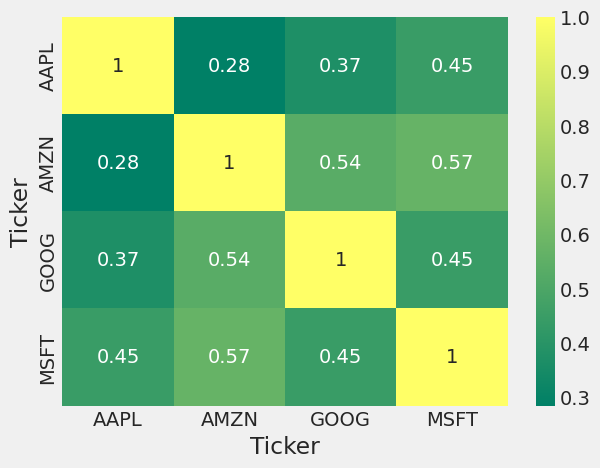

In [27]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: xlabel='Ticker', ylabel='Ticker'>

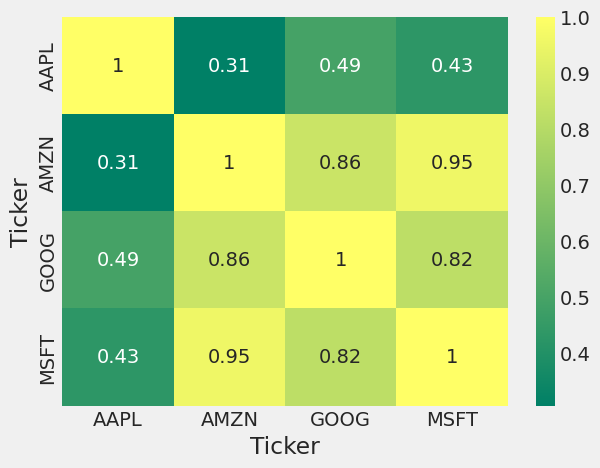

In [28]:


sns.heatmap(closing_df.corr(), annot=True, cmap='summer')



In [29]:
# Get the stock quote
# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483711,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754260,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400
...,...,...,...,...,...,...
2024-07-05,221.649994,226.449997,221.649994,226.339996,226.339996,60412400
2024-07-08,227.089996,227.850006,223.250000,227.820007,227.820007,59085900
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100


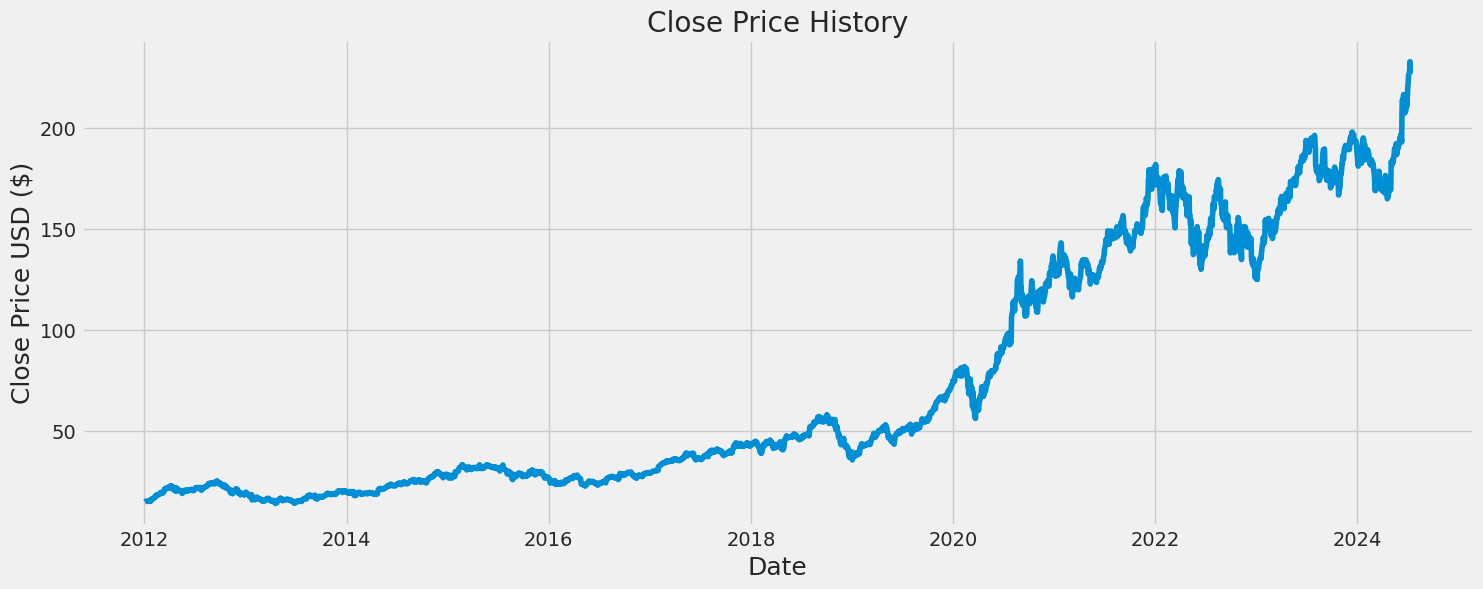

In [30]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2993

In [32]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00337523],
       [0.00373558],
       [0.004484  ],
       ...,
       [0.9803682 ],
       [1.        ],
       [0.97329168]])

In [33]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00337523, 0.00373558, 0.004484  , 0.00519655, 0.00508731,
       0.00533352, 0.00522101, 0.00503187, 0.00477424, 0.00557158,
       0.00629065, 0.0060689 , 0.00485414, 0.00601346, 0.00487207,
       0.00915226, 0.00882126, 0.00925336, 0.01018766, 0.01075346,
       0.01070617, 0.0105317 , 0.01127523, 0.01197474, 0.01276719,
       0.01404717, 0.01673594, 0.0167767 , 0.01827355, 0.0193921 ,
       0.01746969, 0.01820995, 0.01819528, 0.02027097, 0.01997583,
       0.02052206, 0.02150365, 0.02204989, 0.02362337, 0.02476964,
       0.02510064, 0.02521642, 0.0232565 , 0.02278364, 0.02285375,
       0.02469627, 0.02521479, 0.02632845, 0.02895363, 0.03245605,
       0.03180056, 0.03180219, 0.03433444, 0.03512689, 0.03456271,
       0.03404746, 0.03351101, 0.03529319, 0.03651611, 0.0370281 ])]
[0.03576279304273537]

[array([0.00337523, 0.00373558, 0.004484  , 0.00519655, 0.00508731,
       0.00533352, 0.00522101, 0.00503187, 0.00477424, 0.00557158,
       0.00629065, 0.0060689 , 0.00

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2933/2933 [==============================] - 163s 54ms/step - loss: 8.1151e-04


In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 4s 102ms/step


4.199411058153685

<ipython-input-36-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


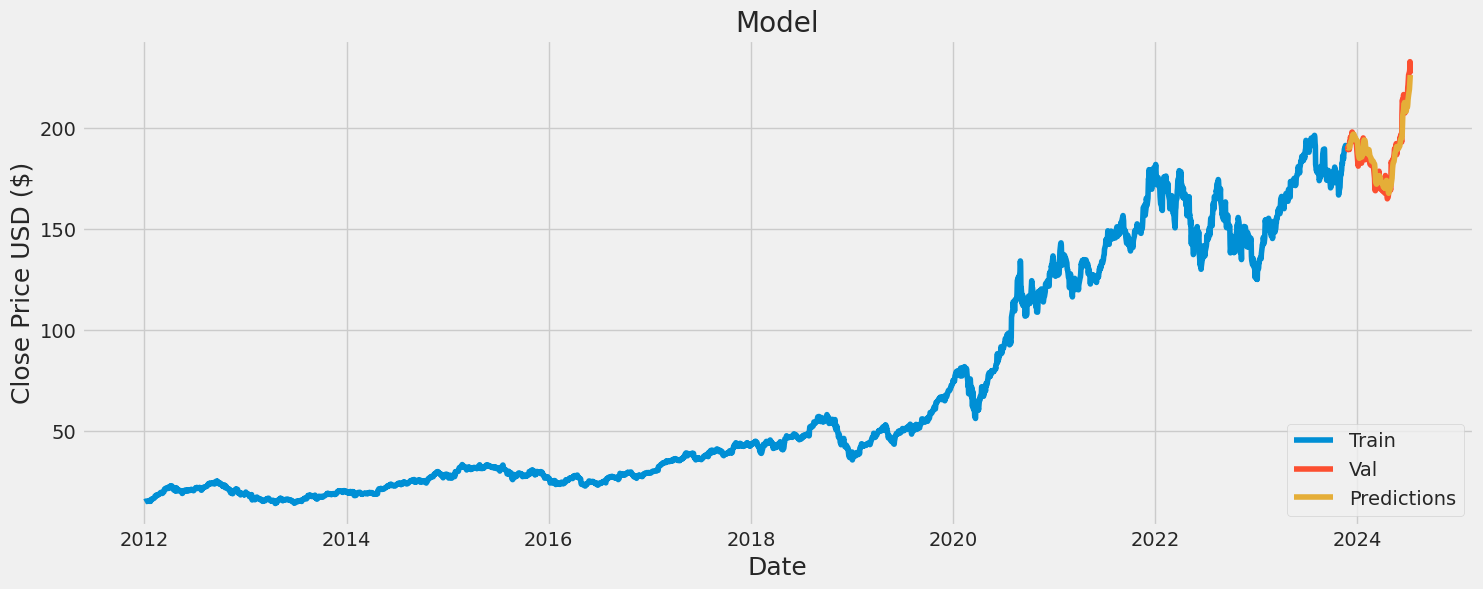

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-11-24,189.970001,190.584595
2023-11-27,189.789993,190.632019
2023-11-28,190.399994,190.482788
2023-11-29,189.369995,190.452682
2023-11-30,189.949997,190.247131
...,...,...
2024-07-05,226.339996,216.569992
2024-07-08,227.820007,219.380341
2024-07-09,228.679993,221.977081
